In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
X = np.array([[-4,2],[-3,-1],[-2,-3],[-2,1],[-2,2],[-1,-2],[-1,1],[0,-3],[1,-1],[2,0],[2,3],[3,1]])
y = np.array([-1,-1,1,-1,-1,1,-1,1,1,1,-1,1])


In [5]:
X, y = make_classification(n_classes=2, n_samples=20, n_features = 2
                           ,n_informative=2,n_redundant = 0, 
                           n_clusters_per_class= 1)
y[y==0]=-1

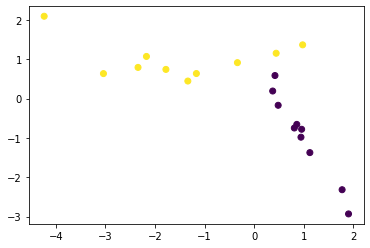

In [6]:

plt.scatter(X[:,0],X[:,1],c=y)
#plt.axis('off')
#plt.savefig(os.getcwd()+"/im/"+"data"+".png")

In [7]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01, iters=40):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
        self.w_data = []
        self.b_data = []
        self.correct = []
        self.wrong = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        for it in range(self.iters):
            
            for idx, x_i in enumerate(X):

                soft_op = np.dot(x_i, self.weights) + self.bias
                if soft_op>=0:
                    y_predicted = 1
                else:
                    y_predicted = -1
            
                self.w_data.append(self.weights)  
                self.b_data.append(self.bias)
                
                if y_predicted*y[idx] >0:
                    self.correct.append(x_i)
                    self.wrong.append([0,0])
                else:
                    self.wrong.append(x_i)
                    self.correct.append([0,0])
                
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
            #print(np.amin(y*np.dot(X, self.weights)))
            #if np.amin(y*(np.dot(X, self.weights)+self.bias))>0:
            #    break
            
                                    
    
    
    def get_weights(self):
        #print(self.weights,bias)
        return self.w_data, self.b_data, self.correct, self.wrong
    
    
    def plot(self, X,y):
        
        plt.clf()
        plt.scatter(X[:,0],X[:,1],c=y)
        x1 = np.linspace(-5,5,10)
        x2 = -(self.weights[0]*x1+self.bias)/self.weights[1]
        plt.plot(x1,x2)
        plt.axis('off')
        plt.show()

In [8]:
model = Perceptron()

In [9]:
model.fit(X,y)

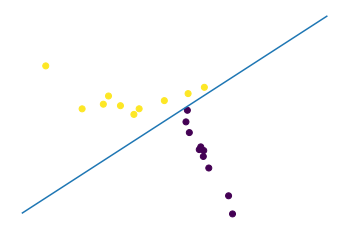

In [10]:
model.plot(X,y)

In [11]:
w,b,correct, wrong = model.get_weights()

In [12]:

w= np.array(w)
b= np.array(b)
correct = np.array(correct)
wrong = np.array(wrong)

In [13]:
w[0]


array([-0.03041695,  0.04557774])

In [14]:
type(w)

numpy.ndarray

In [51]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib
fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
line, = ax.plot([], [], lw=3)
line_w, = ax.plot([], [], lw=1, color = 'black')
line_correct, = ax.plot([], [], color = 'green')
line_wrong, = ax.plot([], [] ,color = 'red')
ax.scatter(X[:,0],X[:,1],c=y)
ax.axis('off')

Writer = animation.writers['ffmpeg']
writer = Writer(fps=4,  bitrate=1800)

def init():
    line.set_data([], [])
    line_w.set_data([],[])
    line_correct.set_data([], [])
    line_wrong.set_data([], [])
    return line,line_w, line_correct,line_wrong

def animate(i):
    x1 = np.array([-5,0,5])
    y1 = -(w[i][0]*x1+ b[i])/w[i][1]

    x2 = np.array([0-b[i],5])
    y2 = ((w[i][1]+b[i])/w[i][0])*x2
    
    x3 = [0,correct[i][0]]
    y3 = [0,correct[i][1]]
    
    x4 = [0,wrong[i][0]]
    y4 = [0,wrong[i][1]]
    
    line.set_data(x1, y1)
    line_w.set_data(x2,y2)
    line_correct.set_data(x3, y3)
    line_wrong.set_data(x4, y4)
    
    return line, line_w,line_correct,line_wrong
    

anim = FuncAnimation(fig, animate, init_func=init,interval = 1000)
#plt.colorbar()
plt.show()
anim.save('animate_perceptron.mp4',fps = 10)

Using matplotlib backend: Qt5Agg
